# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Random Forest, and will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset that we already saw.


In [1]:
import numpy as np

## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer

$$ H(X) = -(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) = 1$$

$$ H(X|x_1) = 0.75 \cdot (-(2/3\cdot \log(2/3)+1/3\cdot \log(1/3)) + 0.25 \cdot (-(1\cdot \log(1)+0\cdot \log(0))= 0.75 \cdot (-(2/3\cdot \log(2/3)+1/3\cdot \log(1/3)) = 0.688 $$
$$ H(X|x_2) = 0.5 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) + 0.5 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) = 0.5 \cdot 1 + 0.5 \cdot 1 = 1 $$
$$ H(X|x_3) = 0.5 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) + 0.5 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5))= 0.5 \cdot 1 + 0.5 \cdot 1 = 1 $$

$$ IG(S,a) = H(S) - H(S|a) $$

$$ IG(X|x_1) = 0.311$$
$$ IG(X|x_2) = 0$$
$$ IG(X|x_3) = 0$$

So we split at first according to the first feature.  Now lets see what is the next split: 

$$ H(X) = -(2/3\cdot \log(2/3)+1/3\cdot \log(1/3)) = 0.918 $$

$$ H(X|x_2) = 2/3 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) + 1/3 \cdot (-(1\cdot \log(1)+0\cdot \log(0)) = 2/3 $$
$$ H(X|x_3) = 2/3 \cdot (-(0.5\cdot \log(0.5)+0.5\cdot \log(0.5)) + 1/3 \cdot (-(1\cdot \log(1)+0\cdot \log(0)) = 2/3 $$

$$ IG(S,a) = H(S) - H(S|a) $$

$$ IG(X|x_2) = IG(X|x_3) = 0.251 $$

The entropy is the same so the IG is the same and we can choose to split acording to any of the two variables. 

Moreover, we get a node with two different labels in any of the options, with probability 0.5 for each labelso we'll chose arbitrary. 
we get 4 differnt trees which can be created with tis algorithm, and all of them have error rate of 1/4. 

![decision tree](Q1DT.png)

In [2]:
0.75*(-1*((2/3)*np.log2(2/3)+(1/3)*np.log2(1/3)))

0.6887218755408672

Now lets find a tree that has 0 error on the train:

![decision tree 2](Q2DT.png)

## Implementing Random Forest From Scratch
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes). 

* Compelete the skeleton class below (hint: you should also create a `DecisionTree` class that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

* To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
  
* Following a discusion during office hours regarding Random Forest we invite the curious and enthusiastic data scientists among you to add to your tree implementation the option of random sampling the number of features used in building the tree. and to plot the mean squared error over all **out of bag (oob)** samples.
    - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1] 


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import time
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
class node():
    
    def __init__(self, parent):
        self.feature = None
        self.is_leaf = False
        self.left = None
        self.right = None
        self.parent = parent
        self.critical_value = None
        self.pred = None
        self.val = None
        
    def get_child(self, x):
        if x[self.feature] > self.critical_value:
            return self.right
        return self.left
     
    def set_left(self, left):
        self.left = left
        
    def set_right(self, right):
        self.right = right
        
    def set_pred(self, pred):
        self.pred = pred
        
    def set_is_leaf(self, is_leaf):
        self.is_leaf = is_leaf
        
    def set_feature_and_value(self, feature, critical_value):
        self.feature = feature
        self.critical_value = critical_value

In [5]:
def print_tree(root, val="val", left="left", right="right"):
    def display(root, val=val, left=left, right=right):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if getattr(root, right) is None and getattr(root, left) is None:
            line = '%s' % getattr(root, val)
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle
        # Only left child.
        if getattr(root, right) is None:
            lines, n, p, x = display(getattr(root, left))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2
        # Only right child.
        if getattr(root, left) is None:
            lines, n, p, x = display(getattr(root, right))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2
        # Two children.
        left, n, p, x = display(getattr(root, left))
        right, m, q, y = display(getattr(root, right))
        s = '%s' % getattr(root, val)
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2
    lines, *_ = display(root, val, left, right)
    for line in lines:
        print(line)
    print()

In [6]:
class Tree():
    
    def __init__(self, min_leaf_size, max_level=0):
        self.min_leaf_size = min_leaf_size
        self.max_level = max_level
        self.root = None
        
    def fit_rec(self, X, y, feature_lst, parent, level):
        new_node = node(parent)
        if ((X.shape[0] < 2*self.min_leaf_size) | 
            (len(feature_lst) == 0) | 
            (level==self.max_level)):
            new_node.set_pred(y.mean())
            new_node.set_is_leaf(True)
            return new_node
        
        feature, critical_value, variance = self.get_feature_critical_value(X, y, feature_lst)
        if variance == np.inf:
            new_node.set_pred(y.mean())
            new_node.set_is_leaf(True)
            return new_node
        self.feature_ranks[feature] += len(feature_lst)
        new_node.set_feature_and_value(feature, critical_value)
        new_node.val = len(X)
        feature_lst.remove(feature)
        X_right, y_right, X_left, y_left = self.split_data(X, y, feature, critical_value)
        left_son = self.fit_rec(X_left, y_left, feature_lst.copy(), new_node, level+1)
        new_node.set_left(left_son)
        right_son = self.fit_rec(X_right, y_right, feature_lst.copy(), new_node, level+1)
        new_node.set_right(right_son)
        return new_node
    
    def fit(self, X, y):
        self.feature_ranks = {k:0 for k in range(X.shape[1])}
        feature_lst = set(range(X.shape[1]))
        root = self.fit_rec(X, y, feature_lst, None, 1)
        self.root = root
        
    def get_critical_value(self,X,y,feature):
        x = X[:,feature]
        med=np.median(x)
        if ((x<=med).sum()<self.min_leaf_size) | ((x>med).sum()<self.min_leaf_size):
            return (med,np.inf)
        variance = np.var(y[x<=med])*((x<=med).sum()) + np.var(y[x>med])*((x>med).sum())
        return (med, variance)
        """
        var_score = np.zeros(len(x))
        for i, val in enumerate(x):
            if ((x<=val).sum()<self.min_leaf_size) | ((x>val).sum()<self.min_leaf_size):
                var_score[i] = np.inf
            else:
                var_score[i] = np.var(y[x<=val])*((x<=val).sum()) + np.var(y[x>val])*((x>val).sum())
        min_idx = np.argmin(var_score)
        return (x[min_idx], var_score[min_idx])
        """
    
    def get_feature_critical_value(self, X, y, feature_set):
        features = []
        criticals = []
        variances = []
        for feature in feature_set:
            critical, variance =  self.get_critical_value(X, y, feature)
            features.append(feature)
            criticals.append(critical)
            variances.append(variance)
        min_idx = np.argmin(variances)
        return [features[min_idx], criticals[min_idx], variances[min_idx]]
    
    def split_data(self, X, y, feature, critical_value):
        right = np.array(X[:,feature] > critical_value)
        X_right = X[right, :]
        X_left = X[~right, :]
        y_right = y[right]
        y_left = y[~right]
        return X_right, y_right, X_left, y_left
    
    def predict(self, X):
        def predict_row(x):
            current = self.root
            while not current.is_leaf:
                current = current.get_child(x)
            return current.pred
        return np.apply_along_axis(predict_row, 1, X)
    
    def mse_score(self, X, y):
        y_hat = self.predict(X)
        return mean_squared_error(y_hat, y)

In [7]:
class TreeEnsemble():
    def __init__(self, X, y, n_trees, sample_sz, min_leaf):
        self.X = X
        self.y = y
        self.n_trees = n_trees
        self.sample_sz = sample_sz
        self.min_leaf = min_leaf
        
    def fit(self):
        tree_idx_lst = []
        tree_lst = []
        oob_idx_lst = set()
        for i in range(self.n_trees):
            sample_idx = np.random.choice(self.X.shape[0], self.sample_sz, replace=False)
            train_idx = np.random.choice(sample_idx, 2*(self.sample_sz//3), replace=False)
            oob_idx = np.setdiff1d(sample_idx, train_idx, assume_unique=True)
    
            X_train, y_train = self.X[train_idx,:], self.y[train_idx]
            
            tree_idx_lst.append(train_idx)
            tree_lst.append(Tree(self.min_leaf))
            oob_idx_lst.update(oob_idx)
            tree_lst[i].fit(X_train, y_train)
        
        self.tree_lst = tree_lst
        self.tree_idx_lst = tree_idx_lst
        self.oob_idx_lst = oob_idx_lst
        
    def predict(self, X):
        pred_lst = []
        for tree in self.tree_lst:
            pred_lst.append(tree.predict(X))
        pred = np.stack(pred_lst, axis=1).mean(axis=1)
        return pred
  
    def oob_mse(self):
        mse = []
        curr_mse = []
        true_y = self.y[np.array(list(self.oob_idx_lst))]
        y_hat = []
        for idx in self.oob_idx_lst:
            pred_lst = []
            for i in range(len(self.tree_lst)):
                if idx not in self.tree_idx_lst[i]:
                    pred_lst.append(self.tree_lst[i].predict(np.expand_dims(self.X[idx], axis=0)))
            y_hat.append(np.mean(np.array(pred_lst)))
        return mean_squared_error(true_y, y_hat)
    
    def feature_importance(self):
        m = self.X.shape[1]
        importance = np.zeros(m)
        for i in range(m):
            for tree in self.tree_lst:
                importance[i] += tree.feature_ranks[i]
        return pd.Series(importance)

Optimal min_leaf size is: 2


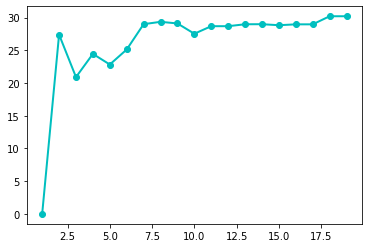

In [8]:
## Now that we have the classifier, lets test it on boston data:

boston = load_boston()
X , y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def find_optimal_leaf_size():
    test_range = 20
    res = np.zeros(test_range-1)
    best_min_leaf_size = 0
    curr_error = np.inf
    for i in range(1, test_range-1):
        clf = Tree(i)
        clf.fit(X_train, y_train)
        res[i] = clf.mse_score(X_test, y_test)
        if res[i] < curr_error:
            curr_error = res[i]
            best_min_leaf_size = i
    print("Optimal min_leaf size is:", best_min_leaf_size)
    plt.plot(np.arange(1, test_range), res, 'co-', linewidth=2, markersize=6);
    return best_min_leaf_size

optimal_leaf_size = find_optimal_leaf_size()

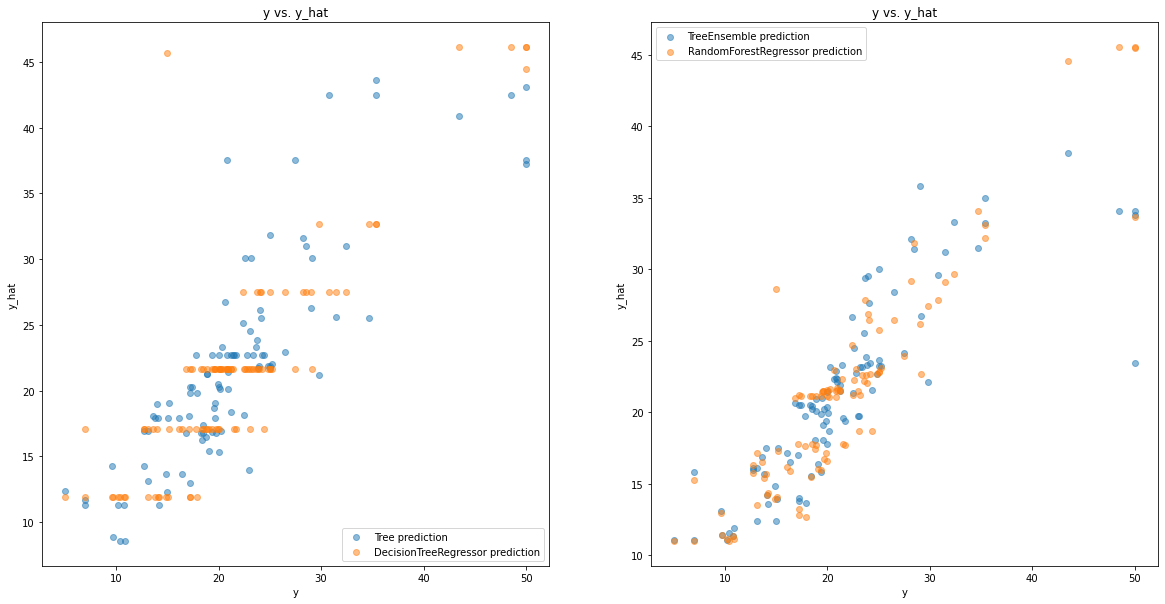

In [9]:
def plot_classifiers_prediction():
    tree_clf = Tree(optimal_leaf_size)
    tree_clf.fit(X_train, y_train)
    forest_clf = TreeEnsemble(X_train, y_train, n_trees = 100, sample_sz = 100, min_leaf = optimal_leaf_size)
    forest_clf.fit()

    sklearn_tree_clf = DecisionTreeRegressor(min_samples_leaf=optimal_leaf_size, max_leaf_nodes=10)
    sklearn_tree_clf.fit(X_train, y_train)
    sklearn_forest_clf = RandomForestRegressor(min_samples_leaf=optimal_leaf_size, max_leaf_nodes=10)
    sklearn_forest_clf.fit(X_train, y_train)
    
    y_hat_tree = tree_clf.predict(X_test)
    y_hat_forest = forest_clf.predict(X_test)
    y_hat_tree_skl = sklearn_tree_clf.predict(X_test)
    y_hat_forest_skl = sklearn_forest_clf.predict(X_test)

    plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1, 2, 1)
    plt.scatter(y_test,y_hat_tree, alpha = 0.5)
    plt.scatter(y_test,y_hat_tree_skl, alpha = 0.5)
    plt.legend(["Tree prediction", "DecisionTreeRegressor prediction"])
    plt.title("y vs. y_hat")
    plt.xlabel("y")
    plt.ylabel("y_hat")
    
    ax2 = plt.subplot(1, 2, 2)
    plt.scatter(y_test,y_hat_forest, alpha = 0.5)
    plt.scatter(y_test,y_hat_forest_skl, alpha = 0.5)
    plt.legend(["TreeEnsemble prediction", "RandomForestRegressor prediction"])
    plt.title("y vs. y_hat")
    plt.xlabel("y")
    plt.ylabel("y_hat")

    plt.show();
    

plot_classifiers_prediction()

In [10]:
def find_optimal_parameters():
    min_error = np.inf
    for n in [1,5,10,20,50,100]:
        for sz in [50,100,300,500]:
            for min_leaf in [1,5]:
                forest = TreeEnsemble(X, y, n, sz, min_leaf)
                forest.fit()
                mse = forest.oob_mse()
                print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
                curr_error = mse
                if min_error > curr_error:
                    min_error = curr_error
                    best_sample_sz = sz
                    best_n_tree = n
                    best_min_leaf = min_leaf
    
    print()
    print("Optimal sample_sz size is:", best_sample_sz)
    print("Optimal n_tree size is:", best_n_tree)
    print("Optimal min_leaf size is:", best_min_leaf)
    return best_sample_sz, best_n_tree, best_min_leaf

best_sample_sz, best_n_tree, best_min_leaf = find_optimal_parameters()

n_trees:1, sz:50, min_leaf:1 --- oob mse: 46.80222222222222
n_trees:1, sz:50, min_leaf:5 --- oob mse: 49.15128472222222
n_trees:1, sz:100, min_leaf:1 --- oob mse: 24.183529411764706
n_trees:1, sz:100, min_leaf:5 --- oob mse: 35.31828312227669
n_trees:1, sz:300, min_leaf:1 --- oob mse: 37.588163888888886
n_trees:1, sz:300, min_leaf:5 --- oob mse: 35.57792641907596
n_trees:1, sz:500, min_leaf:1 --- oob mse: 32.32667989417989
n_trees:1, sz:500, min_leaf:5 --- oob mse: 24.144766413411155
n_trees:5, sz:50, min_leaf:1 --- oob mse: 29.70210216049383
n_trees:5, sz:50, min_leaf:5 --- oob mse: 42.922069757585156
n_trees:5, sz:100, min_leaf:1 --- oob mse: 21.025224546485255
n_trees:5, sz:100, min_leaf:5 --- oob mse: 31.32106500000702
n_trees:5, sz:300, min_leaf:1 --- oob mse: 30.061957917072775
n_trees:5, sz:300, min_leaf:5 --- oob mse: 26.20636037861052
n_trees:5, sz:500, min_leaf:1 --- oob mse: 29.389762922199772
n_trees:5, sz:500, min_leaf:5 --- oob mse: 26.415903591977145
n_trees:10, sz:50, m

## Using Decision Tree and Random Forest for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier` and `sklearn.ensemble.RandomForestClassifier`
- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [12]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-macosx_10_11_x86_64.whl (199.0 MB)
     |████████████████████████████████| 131 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 56.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 55.5 MB/s eta 0:00:01
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
     |████████████████████████████████| 462 kB 52.1 MB/s eta 0:00:01
  Using cached clang-5.0.tar.gz (30 kB)
     |████████████████████████████████| 15.6 MB 24.8 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 1.3 MB 27.5 MB/

In [13]:
from tensorflow.python.keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

11493376/11490434 [==============================] - 1s 0us/step


In [15]:
def find_optimal_parameters_tree():
    mse=[]
    clf_list=[]
    for criterion in ['gini', 'entropy']:
        for splitter in ['best', 'random']:
            for min_samples_leaf in np.arange(1,5):
                for max_features in [None, 'auto', 'sqrt', 'log2']:
                    clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, min_samples_leaf=min_samples_leaf, max_features=max_features,random_state=42)
                    clf.fit(X_train_flatten, y_train)
                    y_pred = clf.predict(X_test_flatten)
                    mse.append(mean_squared_error(y_pred,y_test))
                    clf_list.append([criterion, splitter, min_samples_leaf, max_features])

    min_idx=np.argmin(np.array(mse))
    print(f"min error = {mse[min_idx]}")
    print(f"best classifier: {clf_list[min_idx]}")
    
find_optimal_parameters_tree()

# best_tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=7,random_state=42)
# print(f"Depth of best tree: {best_tree.get_depth()}")

min error = 1.8998
best classifier: ['entropy', 'best', 1, None]


In [18]:
def find_optimal_parameters_Forest():
    MSEs=[]
    clf_list=[]
    for n_estimators in [20,50,100, 150]:
        for criterion in ['gini', 'entropy']:
            for min_samples_leaf in np.arange(1,5):
                clf = RandomForestClassifier(n_estimators = n_estimators, criterion=criterion, min_samples_leaf=min_samples_leaf ,random_state=42)
                clf.fit(X_train_flatten, y_train)
                y_pred = clf.predict(X_test_flatten)
                mse = mean_squared_error(y_pred,y_test)
                MSEs.append(mse)
                clf_list.append([n_estimators, criterion, min_samples_leaf])
                print("n_estimators =", n_estimators,", criterion=",criterion,", min_samples_leaf=", min_samples_leaf, ", mse =", mse)

    min_idx=np.argmin(np.array(MSEs))
    print(f"min error = {MSEs[min_idx]}")
    print(f"best classifier: {clf_list[min_idx]}")
    
find_optimal_parameters_Forest()

n_estimators = 20 , criterion= gini , min_samples_leaf= 1 , mse = 0.7866
n_estimators = 20 , criterion= gini , min_samples_leaf= 2 , mse = 0.7334
n_estimators = 20 , criterion= gini , min_samples_leaf= 3 , mse = 0.7513
n_estimators = 20 , criterion= gini , min_samples_leaf= 4 , mse = 0.8048
n_estimators = 20 , criterion= entropy , min_samples_leaf= 1 , mse = 0.7451
n_estimators = 20 , criterion= entropy , min_samples_leaf= 2 , mse = 0.6933
n_estimators = 20 , criterion= entropy , min_samples_leaf= 3 , mse = 0.7475
n_estimators = 20 , criterion= entropy , min_samples_leaf= 4 , mse = 0.7893
n_estimators = 50 , criterion= gini , min_samples_leaf= 1 , mse = 0.6527
n_estimators = 50 , criterion= gini , min_samples_leaf= 2 , mse = 0.651
n_estimators = 50 , criterion= gini , min_samples_leaf= 3 , mse = 0.651
n_estimators = 50 , criterion= gini , min_samples_leaf= 4 , mse = 0.7149
n_estimators = 50 , criterion= entropy , min_samples_leaf= 1 , mse = 0.6473
n_estimators = 50 , criterion= entropy

In [19]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf=1, random_state=42)
tree.fit(X_train_flatten, y_train)

forest = RandomForestClassifier(n_estimators=150, criterion='entropy', min_samples_leaf=1, random_state=42)
forest.fit(X_train_flatten, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=42)

Sklearn Decision Tree Classifier
10 most influential features oredered by importance:
pixel num 461, importance rate: 0.095232974577282
pixel num 378, importance rate: 0.09492051553818664
pixel num 401, importance rate: 0.06851098085126998
pixel num 542, importance rate: 0.04770341573876137
pixel num 597, importance rate: 0.033533006725060474
pixel num 319, importance rate: 0.024740651925548914
pixel num 211, importance rate: 0.02260410477337495
pixel num 155, importance rate: 0.022459964695713028
pixel num 376, importance rate: 0.02067480851531798
pixel num 206, importance rate: 0.018615612049690478


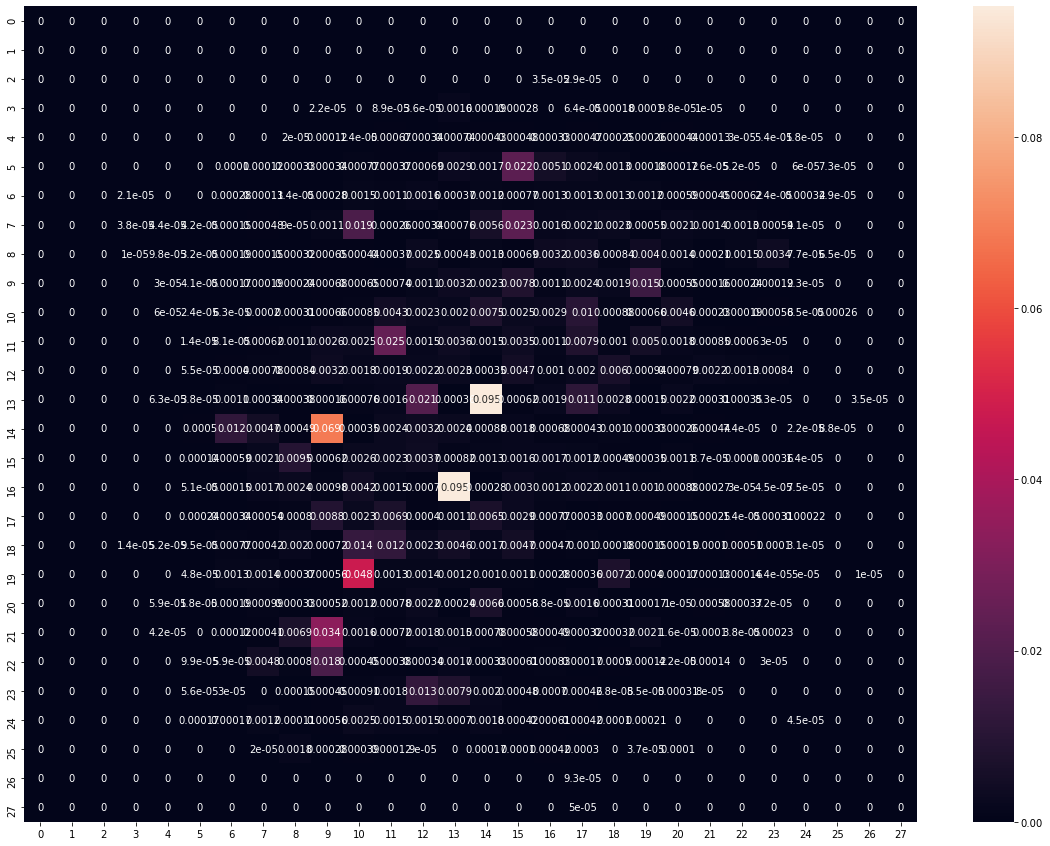

In [20]:
tree_importances = pd.Series(tree.feature_importances_).sort_values(ascending=False).head(10)

print("Sklearn Decision Tree Classifier")
print("10 most influential features oredered by importance:")
for feature, importance in zip(tree_importances.index, tree_importances):
    print(f"pixel num {feature}, importance rate: {importance}")

tree_importances_map = tree.feature_importances_.reshape(28,28)

plt.figure(figsize=(20,15))
sns.heatmap(tree_importances_map,annot=True);

Sklearn Random Forest Classifier
10 most influential features oredered by importance:
pixel num 378, importance rate: 0.012090702837416933
pixel num 461, importance rate: 0.011772584085716636
pixel num 155, importance rate: 0.011046834006345048
pixel num 433, importance rate: 0.00966108362869158
pixel num 406, importance rate: 0.009376626604849097
pixel num 489, importance rate: 0.008747159224887209
pixel num 568, importance rate: 0.008709643114648467
pixel num 462, importance rate: 0.008521722905145962
pixel num 542, importance rate: 0.008486535678094698
pixel num 405, importance rate: 0.008294295797943255


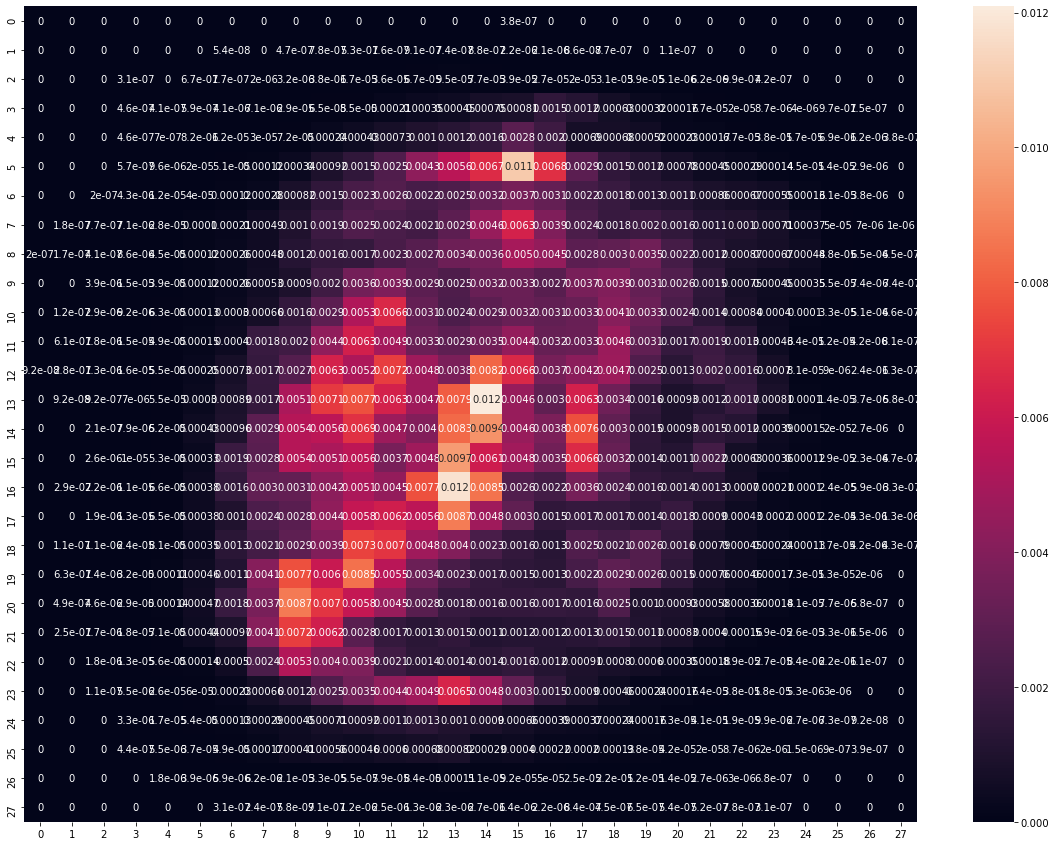

In [21]:
forest_importances = pd.Series(forest.feature_importances_).sort_values(ascending=False).head(10)

print("Sklearn Random Forest Classifier")
print("10 most influential features oredered by importance:")
for feature, importance in zip(forest_importances.index, forest_importances):
    print(f"pixel num {feature}, importance rate: {importance}")

forest_importances_map = forest.feature_importances_.reshape(28,28)

plt.figure(figsize=(20,15))
sns.heatmap(forest_importances_map,annot=True);

In [24]:
data_tree = {'prediction_rate': tree.predict(X_test_flatten).astype(int), 'y': y_test,
       'eq': (tree.predict(X_test_flatten).astype(int) == y_test)}
data_tree = pd.DataFrame(data_tree)
data_tree.groupby('prediction_rate').eq.mean().sort_values(ascending=False)

prediction_rate
1    0.963093
0    0.929520
7    0.921236
6    0.894301
4    0.876518
2    0.866794
9    0.860258
3    0.854564
8    0.839341
5    0.834260
Name: eq, dtype: float64

In [27]:
data_forest = {'prediction_rate': forest.predict(X_test_flatten).astype(int), 'y': y_test,
       'eq': (forest.predict(X_test_flatten).astype(int) == y_test)}
data_forest = pd.DataFrame(data_forest)
data_forest.groupby('prediction_rate').eq.mean().sort_values(ascending=False)

prediction_rate
1    0.991174
6    0.973985
0    0.972919
7    0.971680
4    0.971545
5    0.968539
8    0.964583
2    0.962319
3    0.958621
9    0.958042
Name: eq, dtype: float64

## References
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/